Another right variant

In [192]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import transform

from sklearn.compose import ColumnTransformer

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [193]:
data = pd.read_csv('/content/Car_Purchasing_Data_TP (1).csv', encoding = 'ISO-8859-1')

In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0.0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0.0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1.0,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1.0,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1.0,NaN,59729.15130,NaN,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0.0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1.0,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1.0,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1.0,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


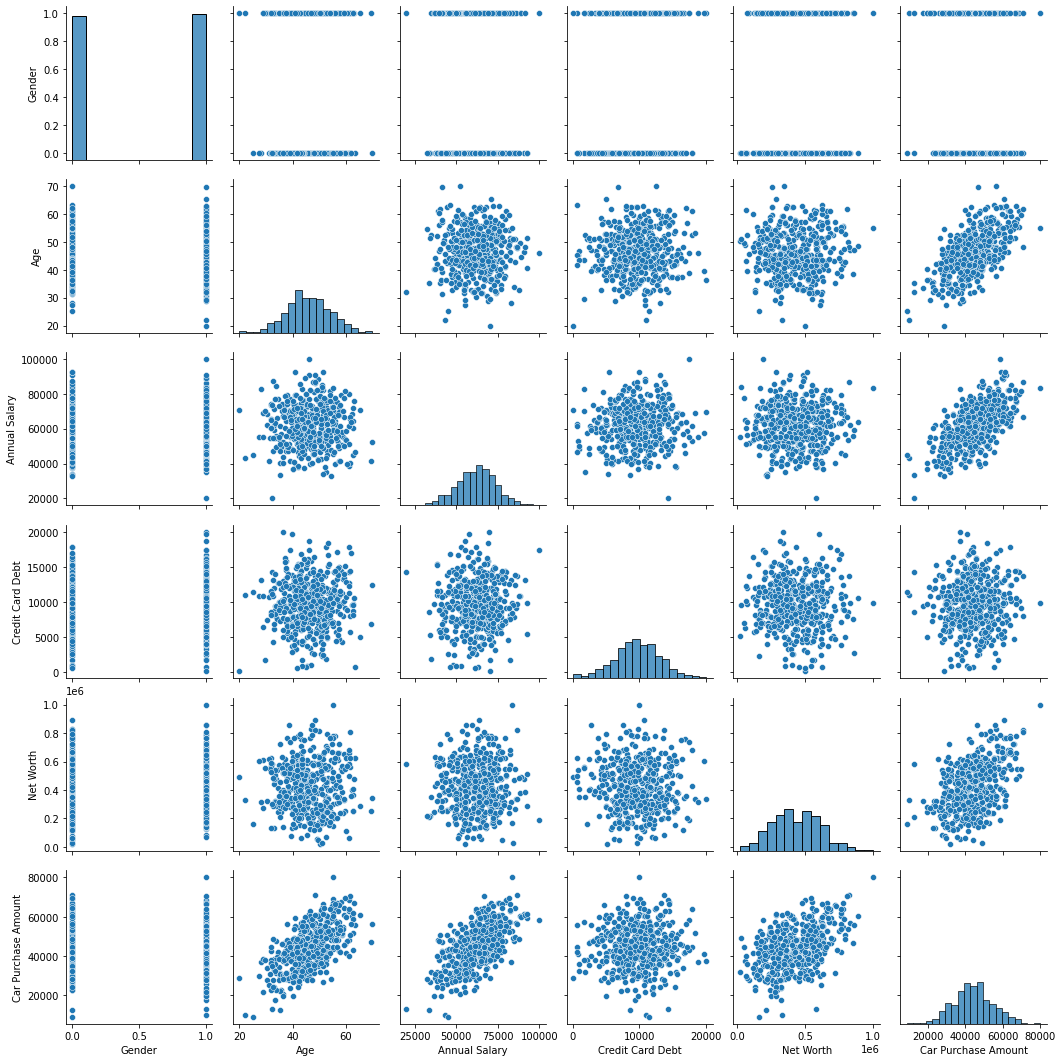

In [196]:
sns.pairplot(data)

In [197]:
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

Customer Name 0.016
Customer e-mail 0.03
Country 0.018
Gender 0.036
Age 0.026
Annual Salary 0.022
Credit Card Debt 0.036
Net Worth 0.032


In [198]:
categorical = [x for x in data.columns if data[x].dtype == 'O']
categorical

['Customer Name', 'Customer e-mail', 'Country']

In [199]:
numerical = [x for x in data.columns if data[x].dtype != 'O']

numerical.remove('Car Purchase Amount')
numerical = data[numerical]
numerical

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0.0,41.851720,62812.09301,11609.380910,238961.2505
1,0.0,40.870623,66646.89292,9572.957136,530973.9078
2,1.0,43.152897,53798.55112,11160.355060,638467.1773
3,1.0,58.271369,79370.03798,14426.164850,548599.0524
4,1.0,NaN,59729.15130,NaN,560304.0671
...,...,...,...,...,...
495,0.0,41.462515,71942.40291,6995.902524,541670.1016
496,1.0,37.642000,56039.49793,12301.456790,360419.0988
497,1.0,53.943497,68888.77805,10611.606860,764531.3203
498,1.0,59.160509,49811.99062,14013.034510,337826.6382


In [200]:
X_train, X_test, y_train, y_test =train_test_split(data.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis =1),
                                                  data['Car Purchase Amount'],
                                                  test_size= 0.1,
                                                  random_state=0)
X_train.shape, X_test.shape

((450, 5), (50, 5))

In [201]:
X_train

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
363,1.0,31.896223,60384.34541,11518.291750,589180.4485
170,1.0,42.432012,65714.46469,12557.081330,362707.0273
343,0.0,43.705397,70136.82862,7765.975483,555993.1081
144,0.0,57.458598,68090.50870,6181.970908,316064.0338
132,0.0,45.402441,63729.12568,12507.197360,271430.0543
...,...,...,...,...,...
323,0.0,33.811252,49607.23466,9344.323770,290711.8670
192,0.0,38.551020,69248.49530,6445.784981,298246.0609
117,0.0,34.681961,NaN,12719.644150,244310.5736
47,0.0,51.168139,57478.37922,2230.096344,158979.7102


In [202]:
X_test

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
90,1.0,49.956014,NaN,8244.470226,173079.1798
254,0.0,45.260364,68499.69447,15436.799680,308445.8598
283,1.0,40.875375,59060.08664,5841.612044,136346.3069
445,0.0,52.610045,76318.87883,6392.211408,245216.1691
461,1.0,38.545834,58632.58875,12035.370790,516817.3173
15,1.0,53.289768,64662.30061,11326.034340,481433.4324
316,0.0,46.520642,73502.12458,11132.392990,765711.6025
489,0.0,54.879545,64430.07398,6924.106833,664862.0102
159,0.0,55.989615,39488.45582,10992.333830,363561.1972
153,0.0,33.775269,55576.84068,9396.008371,475126.1252


## Missing values 

### Continuous variables

In [203]:
for col in numerical:
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean())

Gender 0.035555555555555556
Age 0.022222222222222223
Annual Salary 0.02
Credit Card Debt 0.035555555555555556
Net Worth 0.028888888888888888


## Find discrete variables

In [204]:
discrete = []
for var in numerical:
    if len(data[var].unique()) < 20 :
        print(var,'values: ', data[var].unique())
        discrete.append(var)
print()
print('There are {} discrete var'. format (len(discrete)))    

Gender values:  [ 0.  1. nan]

There are 1 discrete var


In [205]:
discrete

['Gender']

In [206]:
numeric_features_mean = ['Gender']
numeric_features_median = ['Age',
                          'Annual Salary', 'Credit Card Debt', 'Net Worth']
numeric_mean_imputer = Pipeline (steps = [('imputer', SimpleImputer(strategy = 'mean')),])
numeric_median_imputer = Pipeline (steps = [('imputer', SimpleImputer(strategy = 'median')),])

preprocessor = ColumnTransformer(transformers = [('mean_imputer', numeric_mean_imputer, numeric_features_mean),
                                                 ('median_imputer', numeric_median_imputer, numeric_features_median)],
                                 remainder = 'passthrough')  

In [207]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Gender']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Age', 'Annual Salary', 'Credit Card Debt',
                                  'Net Worth'])])

In [208]:
preprocessor.transformers

[('mean_imputer', Pipeline(steps=[('imputer', SimpleImputer())]), ['Gender']),
 ('median_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))]),
  ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'])]

In [209]:
preprocessor.named_transformers_['mean_imputer'].named_steps['imputer'].statistics_

array([0.50460829])

In [210]:
X_train[numeric_features_mean].mean()

Gender    0.504608
dtype: float64

In [211]:
preprocessor.named_transformers_['median_imputer'].named_steps['imputer'].statistics_

array([4.56606310e+01, 6.27214051e+04, 9.63819258e+03, 4.18764506e+05])

In [212]:
X_train[numeric_features_median].median()

Age                     45.660631
Annual Salary        62721.405140
Credit Card Debt      9638.192582
Net Worth           418764.506100
dtype: float64

In [213]:
X_train = preprocessor.transform(X_train)
np.mean(np.isnan (X_train))

0.0

In [214]:
X_test = preprocessor.transform(X_test)
np.mean(np.isnan (X_test))

0.0

In [215]:
pd.DataFrame(X_train, columns = numeric_features_mean + numeric_features_median)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,1.0,31.896223,60384.34541,11518.291750,589180.4485
1,1.0,42.432012,65714.46469,12557.081330,362707.0273
2,0.0,43.705397,70136.82862,7765.975483,555993.1081
3,0.0,57.458598,68090.50870,6181.970908,316064.0338
4,0.0,45.402441,63729.12568,12507.197360,271430.0543
...,...,...,...,...,...
445,0.0,33.811252,49607.23466,9344.323770,290711.8670
446,0.0,38.551020,69248.49530,6445.784981,298246.0609
447,0.0,34.681961,62721.40514,12719.644150,244310.5736
448,0.0,51.168139,57478.37922,2230.096344,158979.7102


In [216]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

y_scaler = MinMaxScaler()

y_train = y_train.values.reshape(-1, 1)
y_train = y_scaler.fit_transform(y_train)

In [217]:
X_train.shape, X_test.shape

((450, 5), (50, 5))

In [218]:
X_train

array([[1.        , 0.23792445, 0.50480432, 0.58277664, 0.58079638],
       [1.        , 0.44864024, 0.57143081, 0.63579528, 0.34970105],
       [0.        , 0.47410793, 0.62671036, 0.39126268, 0.54693174],
       ...,
       [0.        , 0.29363923, 0.53401756, 0.6440923 , 0.22888834],
       [0.        , 0.62336278, 0.46847974, 0.1087177 , 0.14181603],
       [0.        , 0.40284696, 0.63935253, 0.39900402, 0.40491578]])

In [219]:
X_test

array([[1.        , 0.59912029, 0.53401756, 0.41568451, 0.15620324],
       [0.        , 0.50520728, 0.60624618, 0.78277283, 0.29433251],
       [1.        , 0.4175075 , 0.48825108, 0.29304536, 0.11872072],
       [0.        , 0.65220091, 0.70398599, 0.32114732, 0.22981242],
       [1.        , 0.37091667, 0.48290736, 0.60916776, 0.50695645],
       [1.        , 0.66579536, 0.55827876, 0.57296404, 0.47085044],
       [0.        , 0.53041284, 0.66877656, 0.5630808 , 0.76093021],
       [0.        , 0.69759089, 0.55537592, 0.34829466, 0.65802246],
       [0.        , 0.71979231, 0.2436057 , 0.55593234, 0.35057265],
       [0.        , 0.27550539, 0.44471051, 0.47445771, 0.46441441],
       [1.        , 0.5609019 , 0.45147995, 0.4666369 , 0.57828313],
       [0.        , 0.73545895, 0.48960009, 0.52949973, 0.61580367],
       [1.        , 0.4079459 , 0.6399216 , 0.19163732, 0.7579921 ],
       [0.        , 0.56513113, 0.83206446, 0.69422041, 0.81530834],
       [1.        , 0.54894148, 0.

In [220]:
y_train

array([[0.37643596],
       [0.45107076],
       [0.58012487],
       [0.62895125],
       [0.43333307],
       [0.27746526],
       [0.48597146],
       [0.68212351],
       [0.51422109],
       [0.70558126],
       [0.4155271 ],
       [0.54964825],
       [0.47470876],
       [0.54534475],
       [0.46931782],
       [0.57353959],
       [0.70486638],
       [0.26992761],
       [0.43026944],
       [0.59095889],
       [0.49885366],
       [0.61908354],
       [0.20447774],
       [0.6691568 ],
       [0.56409653],
       [0.30935321],
       [0.63399262],
       [0.68227386],
       [0.61669253],
       [0.27381426],
       [0.76406707],
       [0.58735466],
       [0.6502447 ],
       [0.46018938],
       [0.31103807],
       [0.38794277],
       [0.5558489 ],
       [0.41088501],
       [0.56829414],
       [0.3236476 ],
       [0.73406295],
       [0.41040247],
       [0.39802597],
       [0.38150608],
       [0.3059129 ],
       [0.41613807],
       [0.54057623],
       [0.452

In [221]:
y_train.shape


(450, 1)

## Building Neural Network

In [222]:
model= Sequential()
model.add(Dense(25,  activation ='relu'))
model.add(Dense(25,  activation ='relu'))
model.add(Dense(1,  activation ='linear'))

In [223]:
from sklearn import metrics
model.compile(optimizer ='adam', loss= 'mean_squared_error')

In [224]:
epochs_history = model.fit(X_train, y_train, epochs = 50, batch_size = 20, verbose = 1, validation_split = 0.2, shuffle=True)

Epoch 1/50
18/18 [==============================] - 0s 9ms/step - loss: 0.2297 - val_loss: 0.1305
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0601 - val_loss: 0.0263
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0156 - val_loss: 0.0130
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0114
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.0107
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0099
Epoch 8/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0093
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0088
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0082
Epoch 11/50
18/18 [

In [225]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 25)                150       
                                                                 
 dense_28 (Dense)            (None, 25)                650       
                                                                 
 dense_29 (Dense)            (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [226]:
print(epochs_history.history.keys())

dict_keys(['loss', 'val_loss'])


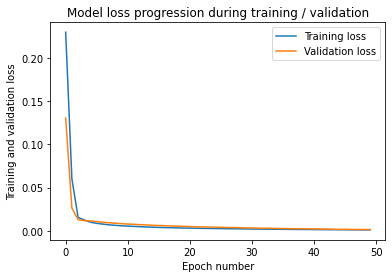

In [227]:
plt.plot(epochs_history.history['loss'])
plt.plot(epochs_history.history['val_loss'])
plt.title('Model loss progression during training / validation')
plt.ylabel('Training and validation loss')
plt.xlabel('Epoch number')
plt.legend(['Training loss','Validation loss'])

## Model Evaluation

In [228]:
def measure_rmse(actual, predicted):
  return np.sqrt(mean_squared_error(actual, predicted))

In [229]:
y_train_pred = model.predict(X_train)

15/15 [==============================] - 0s 1ms/step


In [230]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [231]:
measure_rmse(y_train, y_train_pred)

0.03330839333826202

In [232]:
measure_rmse(y_test, y_scaler.inverse_transform(y_pred))

3980.1372953295872

In [233]:
r2_score(y_train, y_train_pred)

0.9502837976547399

In [234]:
r2_score(y_test, y_scaler.inverse_transform(y_pred))

0.8895131576934218

In [235]:
X_testing = np.array([[1, 50, 50000, 10985, 629312]])

In [236]:
X_test_scaled = scaler.transform(X_testing)

In [237]:
y_predict_scaled = model.predict(X_test_scaled)

1/1 [==============================] - 0s 16ms/step


In [238]:
y_pred_rev = y_scaler.inverse_transform(y_predict_scaled)

In [239]:
print('Expected purchase amount = ', y_pred_rev[:, 0])

Expected purchase amount =  [46310.32]


## Additional model

In [246]:
epochs_history = model.fit(X_train, y_train, epochs = 50, batch_size = 20, verbose = 1, validation_split = 0.2, shuffle=False)

Epoch 1/50
18/18 [==============================] - 0s 6ms/step - loss: 5.6511e-04 - val_loss: 5.9175e-04
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 5.6415e-04 - val_loss: 5.9230e-04
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 5.6446e-04 - val_loss: 5.9282e-04
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 5.6398e-04 - val_loss: 5.9055e-04
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 5.6359e-04 - val_loss: 5.8986e-04
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 5.6432e-04 - val_loss: 5.9186e-04
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 5.6359e-04 - val_loss: 5.8616e-04
Epoch 8/50
18/18 [==============================] - 0s 4ms/step - loss: 5.6378e-04 - val_loss: 5.9744e-04
Epoch 9/50
18/18 [==============================] - 0s 3ms/step - loss: 5.6347e-04 - val_loss: 5.9421e-04
Epoch 10/50
18/18 [===========================

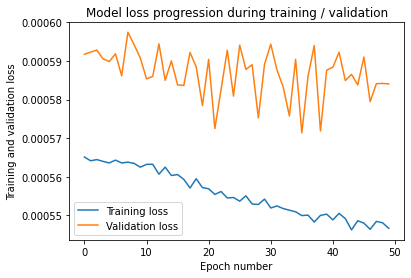

In [247]:
plt.plot(epochs_history.history['loss'])
plt.plot(epochs_history.history['val_loss'])
plt.title('Model loss progression during training / validation')
plt.ylabel('Training and validation loss')
plt.xlabel('Epoch number')
plt.legend(['Training loss','Validation loss'])